<a href="https://colab.research.google.com/github/i8dacake/Mat-421/blob/main/ModuleB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**17. Interpolation**

*Interpolation is a technique used to estimate a function that goes through data points assumed to be reliable measurements.*

## **17.1 Interpolation Problem Statement**

**The following data points represent temperature (in Celsius) measured at different hours of the day. Using interpolation, the temperature at 7am and 7pm needs to be estimated.**

**Hours (x): 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24**

**Temperature (y): 7, 5, 4, 4, 6, 7, 10, 11, 12, 12, 11, 10, 8**

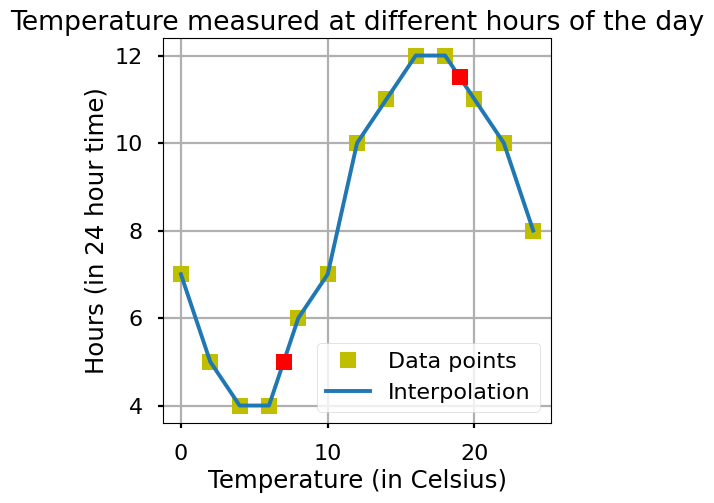

Estimated temperature at 7am: 5.0 degrees Celsius
Estimated temperature at 7am: 11.5 degrees Celsius


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Storing the data points in an array
hours = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
temperature = np.array([7, 5, 4, 4, 6, 7, 10, 11, 12, 12, 11, 10, 8])

# Marking the interpolated points
temp_7am = np.interp(7, hours, temperature) # at 7am
temp_7pm = np.interp(19, hours, temperature) # at 7pm

# Plotting the graph
plt.figure(figsize = (5,5))
plt.plot(hours, temperature, 's', color ='y', label = 'Data points') # plotting data points
plt.plot(hours, temperature, label = 'Interpolation') # plotting interpolation
plt.plot(7, temp_7am, 's', color = 'r') # plotting the interpolated point at 7am
plt.plot(19, temp_7pm, 's', color = 'r')# plotting the interpolated point at 7pm
plt.title('Temperature measured at different hours of the day')
plt.xlabel('Temperature (in Celsius)')
plt.ylabel('Hours (in 24 hour time)')
plt.legend()
plt.grid(True)
plt.show()

# Printing the estimated temperatures
print(f"Estimated temperature at 7am: {temp_7am} degrees Celsius")
print(f"Estimated temperature at 7am: {temp_7pm} degrees Celsius")

When we perform regression on a given set of data, we build a model that accounts for the errors in measurements and then plot the graph. However, since our data is reliable, we do not have to build a model. Although we must assess whether the data is consistent is what the underlying processes are in play.

In our graph of temperature as a function of hours, we observe that the graph is smooth (has no holes). This is what we would expect from a graph representing temperature. We also notice that the temperature decreases from midnight (0 hours) until 7 am, and then begins to significantly increase as the day progresses and then decreases again at night. Again, this is how temperature usually changes during a given day. The data is evenly recorded which is good.

## **17.2 Linear Interpolation**

*When a point $x$ has to be estimated, it is assumed that it lies between $x_{i}$ and $x_{i+1}$. We assume that the values of $x$ are in an ascending order. Then, the linear interpolation at x is $\hat{y}(x) = y_i + \frac{(y_{i+1} - y_{i})(x - x_{i})}{(x_{i+1} - x_{i})}$.*

**Find the linear interpolation at $x$ = 1.5 given $x$ = [0, 1, 2] and $y$ = [1, 3, 2].**

Since the value of $x$ lies between the x-values 1 and 2, the linear interpolation at $x$ = 3 + ( ( (2 - 3) * (1.5 - 1) ) / (2 - 1) ) = 2.5.

**Verify the result using scipy's function interp1d.**

2.5


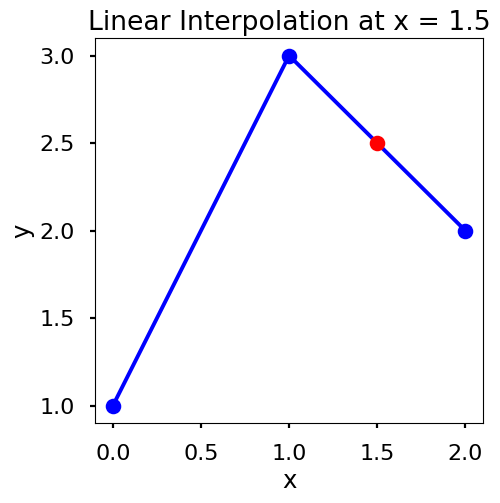

In [61]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

plt.figure(figsize = (5,5))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Find the linear interpolation at $x$ = 67 given $x$ = [2, 10, 24, 76, 99] and $y$ = [48, 93, 3, 98, 42].**

Since the value of $x$ lies between the x-values 24 and 76, the linear interpolation at $x$ = 3 + ( ( (98 - 3) * (67 - 24) ) / (76 - 24) ) = 81.55769.

**Verify the result using scipy's function interp1d.**

81.5576923076923


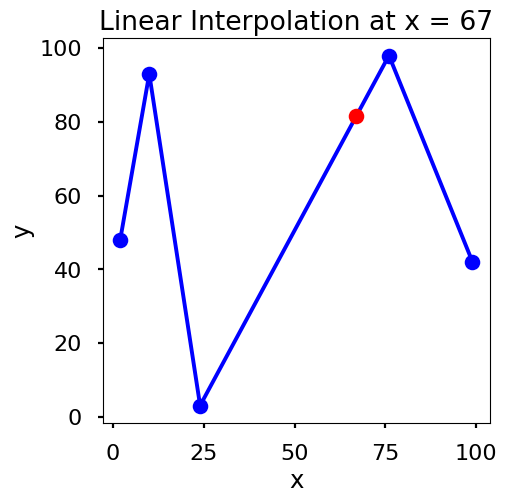

In [62]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = [2, 10, 24, 76, 99]
y = [48, 93, 3, 98, 42]

f = interp1d(x, y)
y_hat = f(67)
print(y_hat)

plt.figure(figsize = (5,5))
plt.plot(x, y, '-ob')
plt.plot(67, y_hat, 'ro')
plt.title('Linear Interpolation at x = 67')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## **17.3 Cubic Spline Interpolation**

*As the name suggests, the interpolating function for a cubic spline interpolation is a set of piecewise cubic functions. Given a set of $n$ points, we must find $n - 1$ cubic functions where each of these cubic function requires $4$ coefficients. This means that there are $4(n - 1)$ equations and consequently, $4(n - 1)$ coefficients.*

*In the following problems, we construct a smooth curve by using the given data points. Depending on the value of $n$, a series of cubic polynomials are used to join with its neighbors. We use scipy’s function CubicSpline for building the cubic spline interpolation.*

**Use CubicSpline to plot the cubic spline interpolation of the data set x = [0, 1, 2] and y = [1, 3, 2] for 0 ≤𝑥 ≤2.**

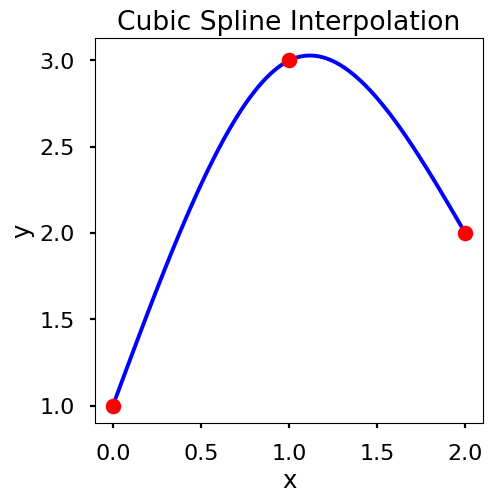

In [63]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0, 2, 100) # generating 100 values of x that are evenly spaced between 0 and 2
y_new = f(x_new)

plt.figure(figsize = (5,5))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Use CubicSpline to plot the cubic spline interpolation of the data set x = [2, 4, 7] and y = [3, 4, 9] for 0 ≤𝑥 ≤2.**

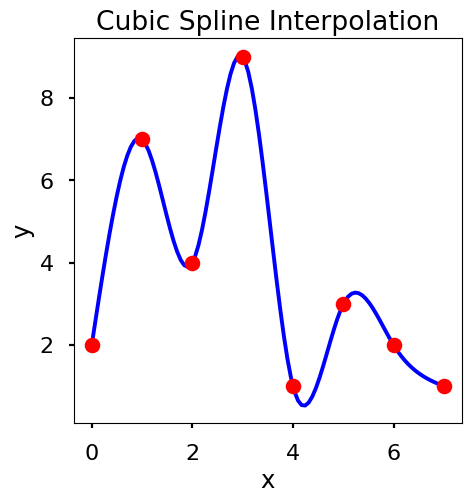

In [64]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [2, 7, 4, 9, 1, 3, 2, 1]

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0, 7, 100) # generating 100 values of x that are evenly spaced between 0 and 7
y_new = f(x_new)

plt.figure(figsize = (5,5))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()